In [52]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 
from scipy.stats import norm, skew, stats
import statsmodels.api as sm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import sklearn


In [53]:
combine = pd.read_csv('fulldataset.csv') # cleand and processed data set
df = pd.read_csv('fulldataset_wdummy.csv') # dummified data set
pd.set_option('display.max_columns', None)

print(df.shape)
df.info()

(2903, 296)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Columns: 296 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(22), int64(274)
memory usage: 6.6 MB


In [54]:
y = combine['SalePrice'].dropna()
newtrain = df[:1444]
newtest = df[1444:]
newtest.shape, newtrain.shape, y.shape

((1459, 296), (1444, 296), (1444,))

In [55]:
# Execute train, test, split for multiple linear regression
X_train,X_test,y_train,y_test = train_test_split(newtrain, y, test_size = .30, random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1010, 296), (434, 296), (1010,), (434,))

### Multiple Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
print('R^2 is equal to %.3f' %(linear.score(X_train, y_train)))
print('RSS is equal to %.3f' %(np.sum((y_train-linear.predict(X_train))**2)))
print('The intercept is %.3f' %(linear.intercept_))
# print('The slopes are %s' %(linear.coef_))


R^2 is equal to 0.936
RSS is equal to 350769091592.505
The intercept is -813949.163


In [58]:
print(linear.score(X_test, y_test))
print(r2_score(y_test, linear.predict(X_test)))

0.8816452287403729
0.8816452287403729


In [59]:
predictions = linear.predict(newtest)
# newtest.loc[:, 'SalePrice'] = predictions
predictions = pd.Series(predictions)
predictions.shape



(1459,)

In [60]:
id_no = pd.Series(range(1461,2920))
MLR = pd.concat([id_no,predictions],axis=1)
MLR.columns = ['Id','SalePrice']

In [61]:
print(MLR.shape)
MLR.head()

(1459, 2)


,Id,SalePrice
0,1461,117783.836721
1,1462,179720.301302
2,1463,189379.579750
3,1464,193609.159302
4,1465,199298.010315


In [62]:
MLR = MLR.dropna()
MLR.to_csv('LinearPred.csv', index=False)

In [63]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(X_train) 
linear_results = sm.OLS(y_train, X_add_const)
results = linear_results.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     38.57
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          1.60e-314
Time:                        11:35:36   Log-Likelihood:                -11364.
No. Observations:                1010   AIC:                         2.328e+04
Df Residuals:                     732   BIC:                         2.465e+04
Df Model:                         277                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.724e+

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


### MLR with Log of y

1.4494413655172598

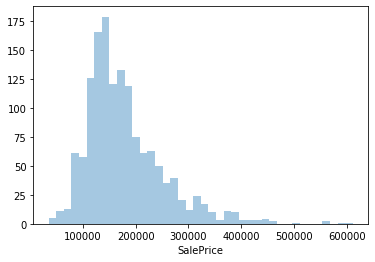

In [64]:
sns.distplot(y, norm_hist=False, kde=False)
skew(y)
# A skewness value greater than zero means that there is more weight in the right tail 
# of the distribution

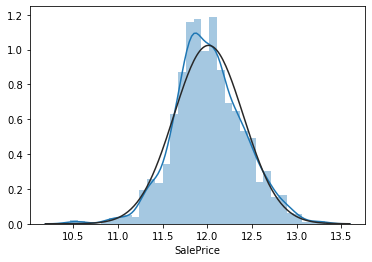

In [65]:
y_log = np.log(y) # Apply log to SalePrice
sns.distplot(y_log, fit=norm)


In [66]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(newtrain, y_log, test_size = .30, random_state= 42)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((1010, 296), (434, 296), (1010,), (434,))

In [67]:
# Fit a new MLR model with log of SalePrice
linear2 = LinearRegression()
linear2.fit(X_train2, y_train2)
print('R^2 for train is equal to %.3f' %(linear2.score(X_train2, y_train2)))
print('RSS is equal to %.3f' %(np.sum((y_train2-linear2.predict(X_train2))**2)))
print('The intercept is %.3f' %(linear2.intercept_))


R^2 for train is equal to 0.948
RSS is equal to 7.760
The intercept is 4.159


In [68]:
print('R^2 for test is equal to %.3f' %(linear2.score(X_test2, y_test2)))

R^2 for test is equal to 0.866


In [73]:
print("Root mean squared error is %.2f" %(mean_squared_error(y_train2, linear2.predict(X_train2), squared=False)))

Root mean squared error is 0.09


In [69]:
new_predictions = linear2.predict(newtest)
new_predictions = np.e**new_predictions # to reverse the log on SalePrice
# newtest.loc[:, 'SalePrice'] = predictions
new_predictions = pd.Series(new_predictions)

In [70]:
id_no = pd.Series(range(1461,2920))
MLR_logy = pd.concat([id_no,predictions],axis=1)
MLR_logy.columns = ['Id','SalePrice']

In [71]:
print(MLR_logy.shape)
MLR_logy.head()

(1459, 2)


,Id,SalePrice
0,1461,117783.836721
1,1462,179720.301302
2,1463,189379.579750
3,1464,193609.159302
4,1465,199298.010315


In [200]:
MLR_logy = MLR_logy.dropna()
MLR_logy.to_csv('LinearPred2.csv', index=False)